In [7]:
# dane
g = 9.81
m = 2
vx₀ = 30
α = π / 4
vy₀=26.5
v₀=30
# obliczenia
czas = (2 * v₀ * sin(α)) / g
#zasieg = (v₀ ^ 2 * sin(2 * α)) / g
h=80
hₘ = h+((v₀ * sin(α)) ^ 2) / (2 * g)
czas = (2 * v₀ * sin(α)) / g


4.324812117348913

In [8]:
function y_num(v₀, α, k, m, g,h, dt)
    vy = zeros(floor(Int, czas / dt), 1)
    vy[1] = v₀ * cos(α)
    y = zeros(floor(Int, czas / dt), 1)
    y[1] = 0
    for i in (2 : floor(Int, czas / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt - ((1 / 2) * g * dt ^ 2) - (1 / 2) * (k / m) * vy[i-1] * dt ^ 2
    end
    return y
end
function x_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, czas / dt), 1)
    vx[1] = v₀ * cos(α)
    x = zeros(floor(Int, czas / dt), 1)
    x[1] = 0
    for i in (2 : floor(Int, czas / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        x[i] = x[i-1] + vx[i-1] * dt - (1 / 2) * (k / m) * vx[i-1] * dt ^ 2
    end
    return x
end


x_num (generic function with 1 method)

In [13]:
dt=0.001
k=0.5
czas_opor = 0
for i in (1 : floor(Int, czas / dt))
    if abs(y_num(v₀, α, k, m, g,h, dt)[i]) < 0.007
        czas_opor = i
    end
end
czas_opor

3748

In [14]:
zasieg_opor = x_num(v₀, α, k, m, dt)[czas_opor]

51.59648732658971

In [11]:
h=80

for i in (1 : floor(Int, czas / dt))
    czas_opor=0
    if abs(y_num(v₀, α, k, m, g, h,dt)[i]) < 80.007
        czas_opor = i
    end
end

czas_opor

4324

In [37]:
czas_opor=4324
#czas_opor_endd=0
for j in (czas_opor : floor(Int, czas / dt))
    czas_opor_endd=0
    if abs(y_num(v₀, α, k, m, g, h,dt)[j]) < 10.07
        czas_opor_endd = czas_opor+j
    end
end
czas_opor_endd

8648

## wizualizacja 

In [39]:
using Plots
using Printf

In [52]:
#dane
g=-9.81

friction=0.1
aerodrag=0.1

height_inrun = 150
height_ramp = 100
length_ramp = 15
distance_max = height_inrun * 2

angle_inrun = 35/180 * π
angle_slope = 32/180 * π

distance_ramp = (height_inrun - height_ramp)/tan(angle_inrun)
length_slope = height_ramp / tan(angle_slope)
distance_slope= distance_ramp + length_ramp + length_slope
tan_inrun = tan(angle_inrun)
tan_slope = tan(angle_slope)
cos_inrun = cos(angle_inrun)
cos_slope = cos(angle_slope)
sin_inrun = sin(angle_inrun)
sin_slope = sin(angle_slope)

0.5299192642332049

In [53]:
function draw_track()
    axis_x = [0,distance_max] #not sure about these list xd
    axis_y = [0,distance_max]
    #nie wyświetla tego narazie
    #plot(axis_x,axis_y,seriestype = :scatter, leg = false) 
    
    track_x = []
    track_y = []
    
    #draw the in-run
    push!(track_x,0.0)
    push!(track_y,height_inrun)
    push!(track_x,distance_ramp)
    push!(track_y,height_ramp)
    #draw the ramp
    push!(track_x,distance_ramp + length_ramp)
    push!(track_y,height_ramp)
    #draw the slope
    push!(track_x,distance_slope)
    push!(track_y,0)
    
    return track_x,track_y,axis_x,axis_y
end

function ski_a_bit(posx,posy,vx,vy,timebit)
    gy=g
    gx=0
    
    if posx < distance_ramp #skier on in-rum
        gx= -g*sin_inrun*cos_inrun * (1-friction)
        gy= g*(1-cos_inrun*cos_inrun)* (1-friction)
        
    elseif posx < distance_ramp + length_ramp #skier on ramp
        gx=0
        gy=0

        if vy!=0
            vx=(vx^2 + vy^2)^0.5
            @printf("Speed at ramp: %.2f m/s'", vx)
        end
        #enforce a zero vertical speed as the ramp is 'flat'
        vy=0
    elseif posx < distance_slope #skier on the slope
        slope_height_posx = (distance_slope - posx)* tan_slope
        if posy >= slope_height_posx -1.0
            gx=gx *aerodrag
            gy=gy *(1-aerodrag)
        else
            posy = slope_height_posx + 1 
            
            gx=-g*sin_slope*cos_slope
            gy= g*(1-cos_slope*cos_slope)
            angle_landing = atan(-vy/vx) - angle_slope
            jumped = ((posx-(distance_ramp+length_ramp))^2 +(posy-height_ramp)^2)^0.5
            v_new=(vx^2+vy^2)^0.5 * cos(angle_landing)
            
            vx= v_new * cos_slope
            vy= -v_new * sin_slope
            if angle_landing > 0.15
                @printf("landing as angle %.f, speed at %.2fm/s, jumped %.2fm",angle_landing,v_new,jumped)
            end
        end
    else #skier on the ground/flat surface
        gx=0
    end
    
    if posy <0
        gy=0
        vx=(vx^2+vy^2)^0.5
        vy=0
    end
    
    #now suppose that we have the correct acceleration,speed and position
    #calculate new position for x
    #based on second newton's law
    vx += gx*timebit*0.5
    posx += vx*timebit + 0.5*gx*timebit^2
    vx += gx*timebit*0.5
    #same for y
    vy += gy*timebit*0.5
    posy += vy*timebit + 0.5*gy*timebit^2
    vy += gy*timebit*0.5 
    
    return posx,posy,vx,vy
end

function ski()
    me_x = 0 
    me_y = height_inrun
    speed_x = 0
    speed_y = 0
    timebit = 0.02 #second
    counter = 0
    
    motion_x=[]
    motion_y=[]
    
    while me_x < distance_max
        me_x,me_y,speed_x,speed_y= ski_a_bit(me_x,me_y,speed_x,speed_y, timebit)
        counter += 1
        if counter %10 ==0
            push!(motion_x,me_x)
            push!(motion_y,me_y)
        end
    end
    
    track_x,track_y,axis_x,axis_y=draw_track()
    plot(axis_x,axis_y,seriestype = :scatter, leg = false) 
    plot!(track_x,track_y)
    plot!(motion_x,motion_y, seriestype=:scatter)
end
    

ski (generic function with 1 method)

Speed at ramp: 29.68 m/s'landing as angle 0.344291, speed at 45.10m/s, jumped 149.12m

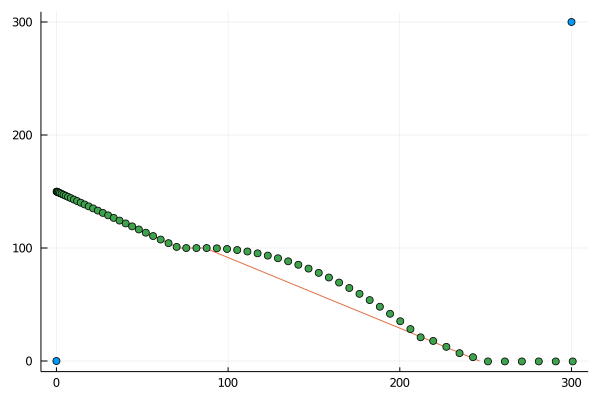

In [55]:
draw_track()
ski_a_bit(2,2,30,24,5)
track_x,track_y=draw_track()
ski()